In [1]:
# 分析用
import numpy as np

# プロット用
import matplotlib.pyplot as plt
%matplotlib inline

# 機械学習用
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit

# データ
X = np.load('n73-x.npy')
y = np.load('n73-y.npy')
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [2]:
print(X, y)
print(len(X), len(X[0]), len(y))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [0 0 0 ... 0 0 1]
10661 8289 10661


In [3]:
ss = ShuffleSplit(n_splits=1,
                  train_size=0.8,
                  test_size=0.2,
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [4]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

8528 2133
8528 2133


In [5]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9207317073170732

In [6]:
clf.score(X_test, y_test)

0.7393342709798406

In [7]:
clf.predict(X_test)

array([1, 1, 0, ..., 0, 0, 1])

In [8]:
clf.predict_proba(X_test)

array([[0.4094248 , 0.5905752 ],
       [0.13047303, 0.86952697],
       [0.93524388, 0.06475612],
       ...,
       [0.66840685, 0.33159315],
       [0.98756687, 0.01243313],
       [0.01356425, 0.98643575]])

In [9]:
X_test_value = clf.decision_function(X_test)
X_test_value

array([ 0.36634371,  1.89678282, -2.67017915, ..., -0.7009883 ,
       -4.37487974,  4.28666046])

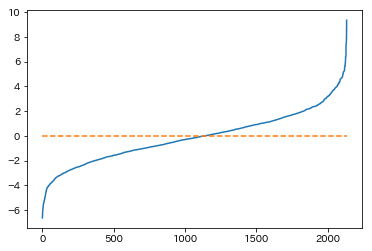

In [10]:
plt.plot(np.sort(X_test_value))
plt.plot([0, 2133], [0, 0], linestyle='--')

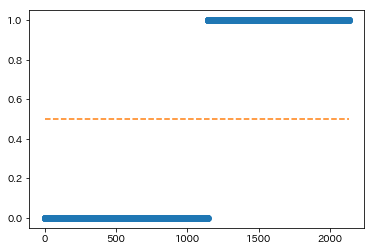

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# plt.plot(np.sort(sigmoid(X_test_value)))
plt.plot(np.sort(clf.predict(X_test)),"o")

plt.plot([0, 2133], [0.5, 0.5], linestyle='--')


In [12]:
import random
from nltk import stem
import re
from n71.n71 import jadge_stopword

pattern = re.compile('[a-zA-Z0-9]')
test_data = []
result_test_x = []
result_test_y = []
ps = stem.PorterStemmer()
sentiment = open('sentiment.txt').readlines()
feature = open('n73-feature.txt').readlines()
feature = {v.replace('\n', ''):k for k, v in enumerate(feature)}

for i in range(10):
    n = random.randint(0, len(sentiment)-1)
    test_data.append(sentiment[n])

for td in test_data:
    wl = td.split()
    label = wl.pop(0)
    if label == '+1':
        result_test_y.append(1)
    else:
        result_test_y.append(0)
    x = [0 for i in range(len(feature))]
    for w in wl:
        check = [re.match(pattern, c) for c in w]
        w = ps.stem(w)
        if None not in check and jadge_stopword(w) == False:
            if feature.get(w) is not None:
                x[feature.get(w)] = 1
    result_test_x += x

In [13]:
test_y= np.array(result_test_y)
test_x = np.array(result_test_x)
test_x = test_x.reshape(len(test_y), len(feature))

In [14]:
print(test_y)
print(test_x)

[0 1 0 0 0 1 1 0 0 1]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
clf.predict(test_x)
predict_y = clf.predict(test_x)

In [16]:
for pre, res in zip(predict_y, test_y):
    if pre != res:
        print('{} {} wrong!'.format(pre, res))
    else:
        print(pre, res)

0 0
1 1
1 0 wrong!
0 0
0 0
1 1
1 1
0 0
0 0
1 1


In [17]:
w = {k:v for k, v in enumerate(list(clf.coef_[0]))}
sorted(w.items(), key=lambda x: -x[1])

[(2082, 2.065833271114551),
 (7051, 1.7730098898716025),
 (4397, 1.7214264911532642),
 (7655, 1.7019422252928098),
 (5553, 1.6955638533393627),
 (1282, 1.65438433957135),
 (242, 1.6339752148223552),
 (90, 1.6025199910221057),
 (692, 1.5950605167215335),
 (4103, 1.592579176196572),
 (7705, 1.5706491469161037),
 (2137, 1.5699099449643217),
 (2428, 1.5683645809744589),
 (461, 1.5261882457601164),
 (2905, 1.5069149928527015),
 (3493, 1.4967845621059952),
 (584, 1.4956984765700427),
 (7672, 1.4795391427790567),
 (5625, 1.4576094432454456),
 (6390, 1.4406385685081653),
 (6508, 1.4200345655294162),
 (654, 1.4186311537758953),
 (5570, 1.4178695476577998),
 (4019, 1.3973481846123064),
 (312, 1.3757372448729244),
 (5970, 1.3620681046234877),
 (5413, 1.3616702541843697),
 (4594, 1.3613532531949155),
 (545, 1.358128767413622),
 (7462, 1.3535866427929306),
 (4118, 1.3484645536627746),
 (6083, 1.3416166518611623),
 (3482, 1.3269904649325721),
 (5349, 1.294580047566238),
 (58, 1.2905925069173987),
 (

In [18]:
with open('n73-feature.txt') as feature:
    feature = feature.readlines()
    print('<<TOP10>>')
    for i, (k, v) in enumerate(sorted(w.items(), key=lambda x: -x[1])):
        if i == 10:
            break
        print(feature[k], v)
    print()
    print('<<WORST10>>')
    for i, (k, v) in enumerate(sorted(w.items(), key=lambda x: x[1])):
        if i == 10:
            break
        print(feature[k], v)

<<TOP10>>
engross
 2.065833271114551
urban
 1.7730098898716025
refresh
 1.7214264911532642
remark
 1.7019422252928098
witti
 1.6955638533393627
smarter
 1.65438433957135
confid
 1.6339752148223552
consider
 1.6025199910221057
quiet
 1.5950605167215335
lane
 1.592579176196572

<<WORST10>>
bore
 -2.3701146376788715
wast
 -1.884030319442518
neither
 -1.8599840435299704
dull
 -1.7503048852732266
appar
 -1.7357765014784665
worst
 -1.726583167233458
fail
 -1.637128856573938
flat
 -1.602569111537378
routin
 -1.5749830578185289
intent
 -1.5673594185897433


In [19]:
y_predict = clf.predict(X_test)
y_predict_probability = clf.predict_proba(X_test)

In [20]:
print('y\tpredict_y\tprobabiliry')
for y, pre_y, pro_y in zip(y_test, y_predict, y_predict_probability):
    print('{}\t{}\t{}'.format(y, pre_y, pro_y[1]))

y	predict_y	probabiliry
0	1	0.5905751954103832
1	1	0.8695269704929153
0	0	0.06475611780006746
0	0	0.23262556703374668
0	0	0.45910241922482414
1	1	0.5631136636024626
1	1	0.8714711741225614
1	0	0.021342192871867397
0	0	0.059560906643005285
0	0	0.16964581224928738
1	1	0.7598554588682856
1	1	0.7732991907977933
0	1	0.9545232798333444
0	1	0.5144759751515116
1	0	0.3504588981003799
0	0	0.04492264906435775
1	0	0.3282487889824365
1	1	0.6498806553649472
0	0	0.36584152784303814
0	0	0.3117517360459231
1	1	0.7139396194914601
1	1	0.9038833646082441
0	1	0.7343079670305467
0	0	0.019975734209333473
1	1	0.7354138970091737
1	1	0.6062525462978857
1	1	0.889465545047026
1	1	0.8693944953490148
1	1	0.565776289077706
1	1	0.9029525513187124
1	1	0.690041861506334
1	0	0.2876486833181769
0	0	0.10654384937509932
1	1	0.9110932246393378
1	1	0.590749997651352
0	0	0.18308960257559176
0	0	0.01801185275662083
0	0	0.24852368906821137
0	1	0.6996515231899115
0	0	0.005480732027113023
1	1	0.5301307964345559
1	1	0.7470632793147

In [21]:
def threat_score(yt, yp):
    TP = 0      # True-Positive     予想が+1、正解も+1
    FP = 0      # False-Positive    予想が+1、正解は-1
    FN = 0      # False-Negative    予想が-1、正解は+1
    TN = 0      # True-Negative     予想が-1、正解も-1
    for yi, ypi in zip(yt, yp):
        if yi == ypi and yi == 1:
            TP += 1
        elif yi == ypi and yi == 0:
            TN += 1
        elif yi == 1 and ypi == 0:
            FN += 1
        elif yi == 0 and ypi == 1:
            FP += 1
    return TP, FP, FN, TN

clf = LogisticRegression()
clf.fit(X_train, y_train)
p_y = clf.predict(X_test)
TP, FP, FN, TN = threat_score(y_test, p_y)
accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
Fmeasure = 2*precision*recall/(precision+recall)

In [22]:
print('正解率\t適合率\t再現率\tF1スコア')
print(accuracy, precision, recall, Fmeasure)

正解率	適合率	再現率	F1スコア
0.7393342709798406 0.7616161616161616 0.702048417132216 0.7306201550387595


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
X = np.load('n73-x.npy')
y = np.load('n73-y.npy')

clf = LogisticRegression()
scores = cross_val_score(clf, X, y, cv=5)

In [26]:
print(scores.mean())

0.7301386063195263


In [27]:
from sklearn.metrics import precision_recall_curve

In [30]:
clf = clf.fit(X_train, y_train)
precision, recall, threshold = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])

Text(0,0.5,'再現率')

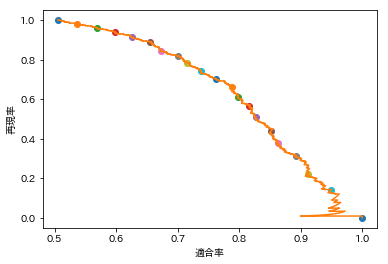

In [41]:
for i in range(21):
    close_point = np.argmin(np.abs(threshold - (i * 0.05)))
    plt.plot(precision[close_point], recall[close_point], 'o')
plt.plot(precision, recall)
plt.xlabel('適合率')
plt.ylabel('再現率')